DAT340, Assignment 1

Romain THEODET

### Task 1

Step 1

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file.
data = pd.read_csv("./task1_CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "MSTV", "ALTV",
                 "MLTV", "Width", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean",
                 "Median", "Variance", "Tendency", "NSP"]
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop("NSP", axis=1)


# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, "normal", "suspect", "pathologic"][(int(y))]


Y = data_shuffled["NSP"].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


Step 2

In [25]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy="most_frequent")

from sklearn.model_selection import cross_val_score
import numpy as np

np.mean(cross_val_score(clf, Xtrain, Ytrain))

0.7805882352941176

Step 3

In [26]:
from sklearn.tree import DecisionTreeClassifier

np.mean(cross_val_score(DecisionTreeClassifier(), Xtrain, Ytrain))

0.9241176470588235

In [27]:
from sklearn.ensemble import RandomForestClassifier

np.mean(cross_val_score(RandomForestClassifier(), Xtrain, Ytrain))

0.9411764705882353

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

np.mean(cross_val_score(GradientBoostingClassifier(), Xtrain, Ytrain))

0.9494117647058824

In [29]:
from sklearn.linear_model import Perceptron

np.mean(cross_val_score(Perceptron(), Xtrain, Ytrain))

0.825294117647059

In [30]:
from sklearn.linear_model import LogisticRegression

# np.mean(cross_val_score(LogisticRegression(max_iter=100), Xtrain, Ytrain))

# There is an ugly warning about the number of iterations, which reaches its limits.
# Otherwise, the result score is about 87.4%.

In [31]:
from sklearn.svm import LinearSVC

# np.mean(cross_val_score(LinearSVC(max_iter=1000), Xtrain, Ytrain))

# Again, there is a long warning about the number of iterations.
# The score is 82.3%.

In [32]:
from sklearn.neural_network import MLPClassifier

# np.mean(cross_val_score(MLPClassifier(), Xtrain, Ytrain))
# It works, but with a warning about the number of iterations, since the model hasn't converged yet.
# The score is around 88.3%.

Without any fine-tuning, we can see that the `GradientBoostingClassifier` has the best cross-validation results,
with around 94% validation.

Step 4

In [33]:
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier()
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9295774647887324


I chose the `GradientBoostingClassifier`, which had the best cross-validation results.
It gave me an accuracy score of 92.9%.

This classifier is an algorithm that combine several weaker learning models,
like decision trees, to create a stronger predictive model.

### Task 2

In [34]:
%run decisionTree.ipynb

depth = 1
scores = [float("nan")]
while True:
    clf = TreeClassifier(max_depth=depth)
    clf.fit(Xtrain, Ytrain)
    Yguess = clf.predict(Xtest)

    scores.append(accuracy_score(Ytest, Yguess))
    print(f"depth:{depth}, score:{scores[depth]}")

    if scores[depth - 1] > scores[depth]:
        break
    depth += 1

bestDepth = 0
for depth, score in enumerate(scores):
    bestDepth = bestDepth if score < scores[bestDepth] else depth
print(f"best depth:{bestDepth}, score:{scores[bestDepth]}")

depth:1, score:0.8215962441314554
depth:2, score:0.8685446009389671
depth:3, score:0.8826291079812206
depth:4, score:0.8896713615023474
depth:5, score:0.8896713615023474
depth:6, score:0.8849765258215962
best depth:5, score:0.8896713615023474


After a bruteforce loop, I chose a max depth of 5, which gives me an accuracy of 88.9%.

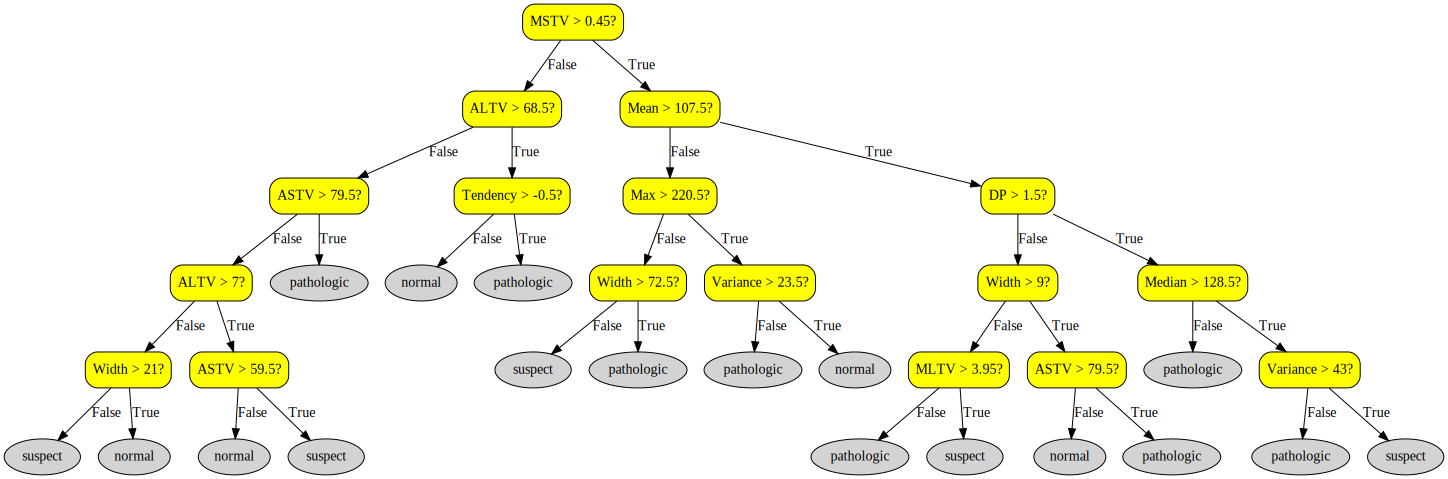

In [35]:
clf = TreeClassifier(max_depth=5)
clf.fit(Xtrain, Ytrain)
clf.draw_tree()
# On my IDE, it shows the right image. If the image isn't rendered, you can find it aside in the directory.

### Task 3

In [36]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("./task3_sberbank.csv")


# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])


alldata["year"] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ["price_doc", "year", "full_sq", "life_sq", "floor", "num_room", "kitch_sq", "full_all"]
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop("price_doc", axis=1)
# For the output, we will use the log of the sales price.
Y = alldata_shuffled["price_doc"].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


def score(model):
    return np.average(cross_validate(model, Xtrain, Ytrain, scoring="neg_mean_squared_error")["test_score"])

In [37]:
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression

score(LinearRegression())

-0.30139865887672024

In [38]:
from sklearn.linear_model import Ridge

score(Ridge())

-0.30139784232179745

In [39]:
from sklearn.linear_model import Lasso

score(Lasso())

-0.3010470671748872

In [40]:
from sklearn.tree import DecisionTreeRegressor

score(DecisionTreeRegressor())

-0.5222037164778938

In [41]:
from sklearn.ensemble import RandomForestRegressor

score(RandomForestRegressor())

-0.28433391674332176

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

score(GradientBoostingRegressor())

-0.2645197655667276

In [43]:
from sklearn.neural_network import MLPRegressor

score(MLPRegressor())
# NOTE: With an error of a magnitude of minus several hundred, there is something fishy with this regressor.
#       Maybe a missing hyperparameter?

-423.3338845519708

In [44]:
from sklearn.metrics import mean_squared_error

regr = GradientBoostingRegressor()
regr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, regr.predict(Xtest))

0.2714620361051084

I picked the gradient boosting algorithm as my regressor,
since it had the closest mean squared error to zero of all the algorithms.
The error is about 0.271 for the test set.

Like the gradient boosting classifier, this regressor is an algorithm that combine several weaker learning models,
like decision trees, to create a stronger model.
